In [9]:
#負責讀檔

import pandas as pd

# 檔案名稱
file_path = 'processed_new_2.csv'

try:
    # 嘗試讀取 CSV 檔案
    # pd.read_csv() 會將 CSV 轉為一個 DataFrame 物件
    df = pd.read_csv(file_path)
    
    # (可選) 印出資料的前 5 行，確認讀取成功且內容正確
    print(f"成功讀取檔案： {file_path}")
    print("資料前 5 行預覽：")
    print(df.head())
    
    # (可選) 顯示 DataFrame 的基本資訊 (欄位名稱、資料型態、是否有缺失值)
    print("\n資料基本資訊：")
    df.info()

except FileNotFoundError:
    print(f"錯誤：找不到檔案 '{file_path}'")
    print("請確認：")
    print(f"1. 檔案名稱 '{file_path}' 是否拼寫正確？")
    print("2. 這個 CSV 檔案是否和您的 Python 程式碼在同一個資料夾中？")
    print("3. 如果不在同一個資料夾，請提供完整的絕對路徑。")

except Exception as e:
    print(f"讀取檔案時發生其他錯誤： {e}")

成功讀取檔案： processed_new_2.csv
資料前 5 行預覽：
   rally  ball_round      time  frame_num  score_status  player_score  \
0      1           1   0:07:39    11496.0           0.0           0.0   
1      1           2  00:07:43    11582.0           0.0           0.0   
2      2           1   0:07:55    11881.0           1.0           1.0   
3      2           2   0:07:56    11900.0           1.0           1.0   
4      2           3   0:07:56    11921.0           1.0           1.0   

   opponent_score          player  server type  ...  moving_x  moving_y  \
0             0.0    Kento MOMOTA     1.0  發短球  ...  0.012041  0.262869   
1             0.0  CHOU Tien Chen     3.0   長球  ... -0.073337  0.594564   
2             0.0    Kento MOMOTA     1.0  發短球  ...  0.011994  0.275664   
3             0.0  CHOU Tien Chen     2.0  推撲球  ... -0.058087  0.142593   
4             0.0    Kento MOMOTA     2.0   殺球  ...  0.158490 -0.000140   

   landing_court_number  ball_distance_x  ball_distance_y   db  set  ma

第一題(wrong)
周天成使用「殺球」得分佔他總得分的百分比是多少？

In [10]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成得分的數據
    chou_points = df[df['getpoint_player'] == 'CHOU Tien Chen']
    
    # 計算周天成總得分
    total_points = len(chou_points)
    
    # 過濾出周天成使用「殺球」得分的數據
    smash_points = chou_points[chou_points['type'] == '殺球']
    
    # 計算周天成使用「殺球」得分的次數
    smash_points_count = len(smash_points)
    
    # 計算百分比
    if total_points > 0:
        smash_percentage = (smash_points_count / total_points) * 100
    else:
        smash_percentage = 0
    
    # 輸出結果
    print(f"周天成使用「殺球」得分佔他總得分的百分比: {smash_percentage:.2f}%")
else:
    print("數據集中沒有可用的數據。")

周天成使用「殺球」得分佔他總得分的百分比: 39.80%


第二題(wrong)
周天成最常使用哪個球種直接得分

周天成最常使用的球種是: 殺球，得分次數為: 78


C:\Users\Danie\AppData\Local\Temp\ipykernel_29200\2287238541.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, ax=ax, palette='viridis')


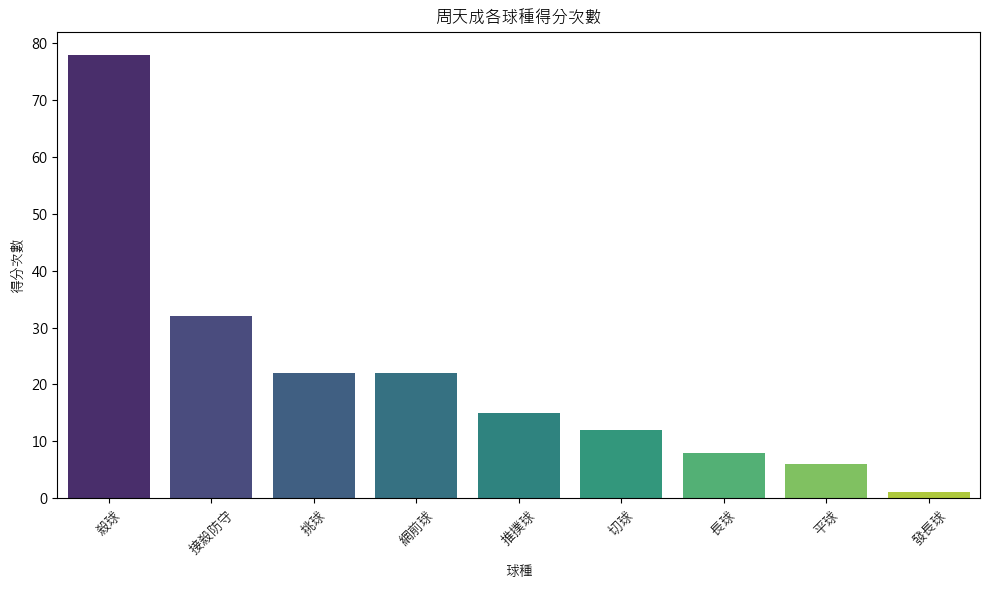

In [11]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成得分的數據
    chou_df = df[df['getpoint_player'] == 'CHOU Tien Chen']
    
    # 計算周天成使用的球種得分次數
    type_counts = chou_df['type'].value_counts()
    
    # 找出最常使用的球種
    most_common_type = type_counts.idxmax()
    most_common_count = type_counts.max()
    
    print(f"周天成最常使用的球種是: {most_common_type}，得分次數為: {most_common_count}")
    
    # 繪製球種得分次數的條形圖
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=type_counts.index, y=type_counts.values, ax=ax, palette='viridis')
    ax.set_title('周天成各球種得分次數')
    ax.set_xlabel('球種')
    ax.set_ylabel('得分次數')
    plt.xticks(rotation=45)
    plt.tight_layout()
else:
    print("數據集中沒有可用的數據。")

第三題(OK)
針對周天成所有「殺球」，繪製其落點熱區圖。

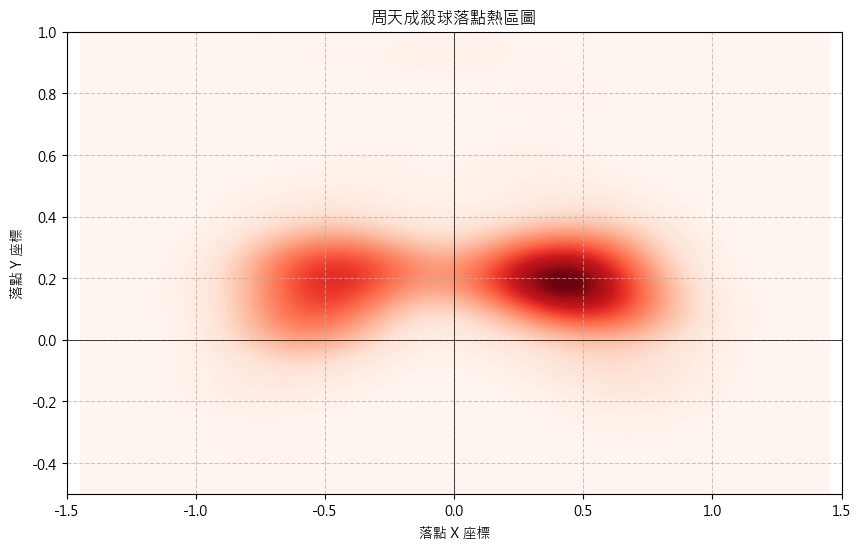

In [12]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被系統預先載入
if len(df) > 0:
    # 篩選出周天成的殺球數據
    chou_smash_df = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

    # 檢查是否有數據
    if len(chou_smash_df) > 0:
        # 繪製落點熱區圖
        plt.figure(figsize=(10, 6))
        sns.kdeplot(
            x=chou_smash_df['landing_x'],
            y=chou_smash_df['landing_y'],
            cmap="Reds", fill=True, thresh=0, levels=100
        )
        plt.title('周天成殺球落點熱區圖')
        plt.xlabel('落點 X 座標')
        plt.ylabel('落點 Y 座標')
        plt.xlim(-1.5, 1.5)
        plt.ylim(-0.5, 1.0)
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.grid(True, linestyle='--', alpha=0.7)
        fig = plt.gcf()  # 獲取當前圖表
        plt.show()
    else:
        print("沒有周天成的殺球數據。")
else:
    print("數據框為空。")

第四題(OK)
分析周天成在雙方都達18分以上時的球種分布。

In [13]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 篩選出周天成在雙方都達18分以上的數據
    chou_df = df[(df['player'] == 'CHOU Tien Chen') & (df['player_score'] >= 18) & (df['opponent_score'] >= 18)]
    
    # 檢查篩選後的數據量
    if len(chou_df) > 0:
        # 計算球種分布
        type_counts = chou_df['type'].value_counts(normalize=True) * 100
        
        # 打印球種分布百分比
        print("周天成在雙方都達18分以上時的球種分布（百分比）:")
        print(type_counts)
        
        # 繪製球種分布圖
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x=type_counts.index, y=type_counts.values, ax=ax)
        ax.set_title('周天成在雙方都達18分以上時的球種分布')
        ax.set_xlabel('球種')
        ax.set_ylabel('百分比 (%)')
        plt.xticks(rotation=45)
        plt.tight_layout()
    else:
        print("沒有符合條件的數據。")
else:
    print("數據框為空。")

周天成在雙方都達18分以上時的球種分布（百分比）:
type
網前球     32.835821
接殺防守    16.417910
殺球      10.447761
發短球      8.955224
推撲球      8.955224
長球       7.462687
平球       5.970149
挑球       4.477612
切球       4.477612
Name: proportion, dtype: float64
Error in callback <function flush_figures at 0x000002094EC4B880> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

第五題(wrong)
幫我繪製周天成得分時球的落點熱區圖

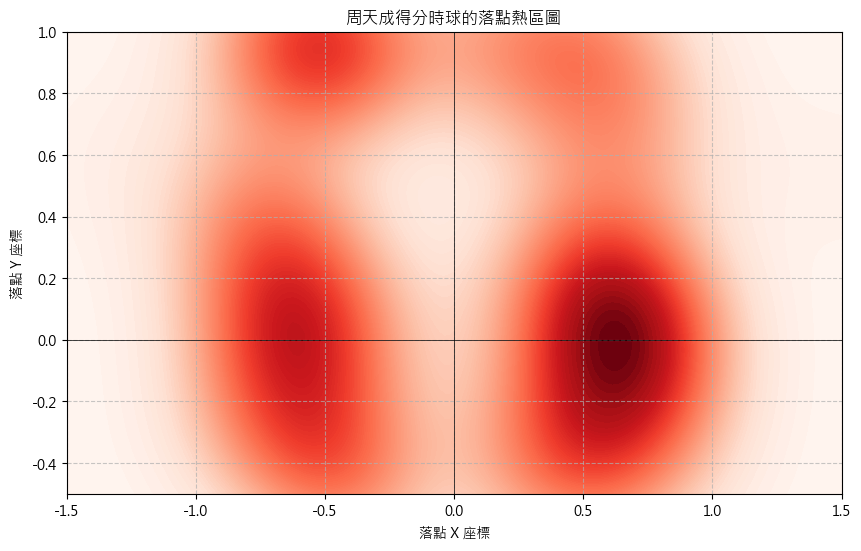

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成得分的數據
    chou_tien_chen_points = df[df['getpoint_player'] == 'CHOU Tien Chen']

    # 檢查是否有數據
    if len(chou_tien_chen_points) > 0:
        # 繪製熱區圖
        plt.figure(figsize=(10, 6))
        sns.kdeplot(
            data=chou_tien_chen_points,
            x='landing_x',
            y='landing_y',
            fill=True,
            cmap='Reds',
            thresh=0,
            levels=100
        )
        plt.title('周天成得分時球的落點熱區圖')
        plt.xlabel('落點 X 座標')
        plt.ylabel('落點 Y 座標')
        plt.xlim(-1.5, 1.5)
        plt.ylim(-0.5, 1.0)
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("沒有周天成得分的數據。")
else:
    print("數據框是空的。")

第六題(OK)
在第一場次中，每回合用的拍數，繪圖

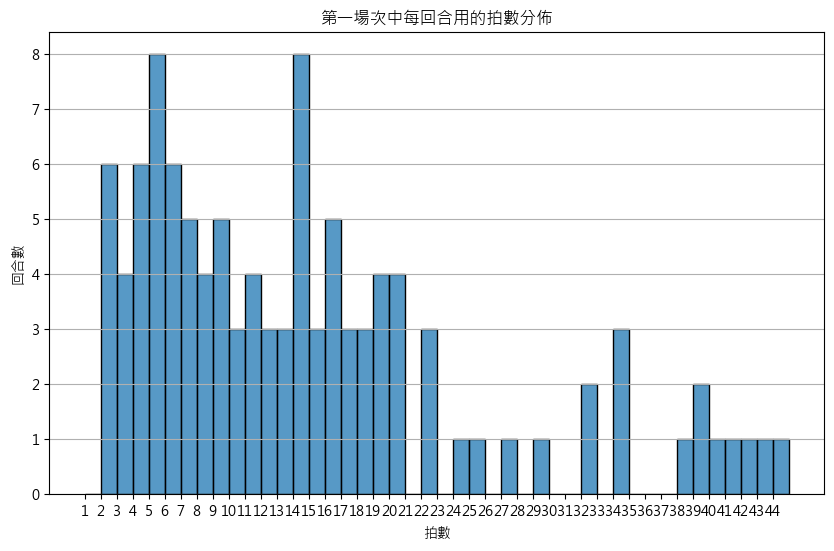

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被系統預先載入
if len(df) > 0:
    # 過濾出第一場比賽的數據
    df_first_match = df[df['match_id'] == 1.0]
    
    # 計算每個回合的拍數
    rally_shots = df_first_match.groupby(['set','rally'])['ball_round'].max()
    
    # 繪製直方圖
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(rally_shots, bins=range(1, rally_shots.max() + 2), kde=False, ax=ax)
    ax.set_title('第一場次中每回合用的拍數分佈')
    ax.set_xlabel('拍數')
    ax.set_ylabel('回合數')
    plt.xticks(range(1, rally_shots.max() + 1))
    plt.grid(axis='y')

    plt.show()
else:
    print("數據集中沒有可用的數據。")

第七題(OK)
繪製周天成殺球時的站點熱區圖

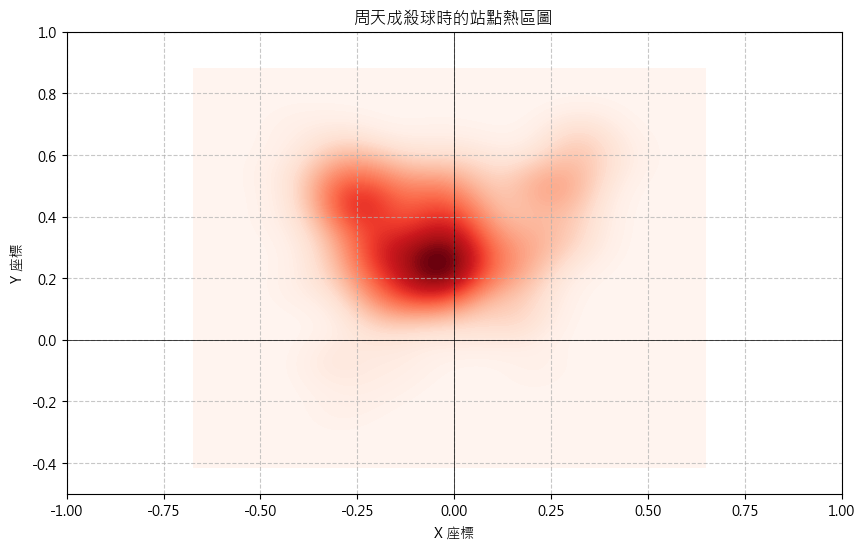

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被系統預先載入
if len(df) > 0:
    # 過濾出周天成的殺球數據
    chou_smash_df = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

    # 繪製熱區圖
    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        x=chou_smash_df['player_location_x'],
        y=chou_smash_df['player_location_y'],
        cmap="Reds", fill=True, thresh=0, levels=100
    )
    plt.title('周天成殺球時的站點熱區圖')
    plt.xlabel('X 座標')
    plt.ylabel('Y 座標')
    plt.xlim(-1, 1)
    plt.ylim(-0.5, 1)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--', alpha=0.7)

    # 顯示圖表
    fig = plt.gcf()
    plt.show()
else:
    print("數據集中沒有可用的數據。")

第八題(wrong)
分析周天成使用殺球，對手都用什麼球種反擊，繪製圓餅圖

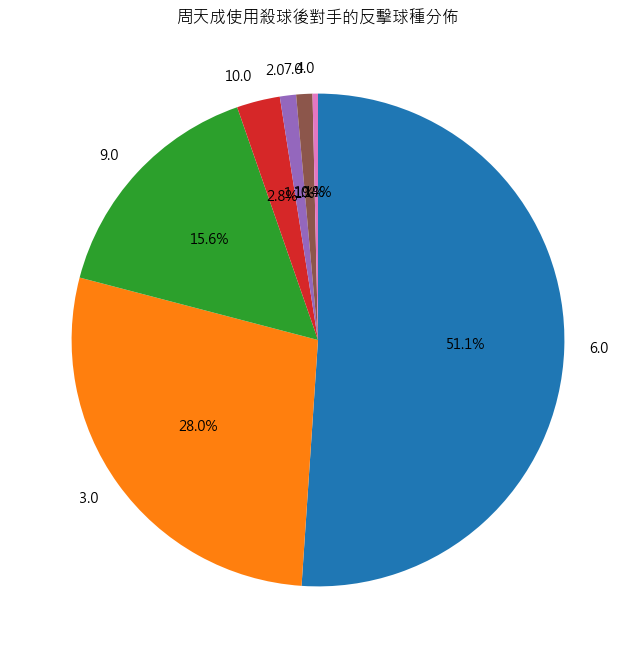

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 選擇周天成使用殺球的情況
    chou_smash_df = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]
    
    # 計算對手反擊的球種
    opponent_response_types = chou_smash_df['opponent_type'].value_counts()

    # 繪製圓餅圖
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(opponent_response_types, labels=opponent_response_types.index, autopct='%1.1f%%', startangle=90, counterclock=False)
    ax.set_title('周天成使用殺球後對手的反擊球種分佈')
    plt.show()
else:
    print("數據集中沒有可用的數據。")

第九題(OK)
當周天成在「後場」擊球時，他最常使用哪三種球種?

周天成在後場最常使用的三種球種:
長球: 227 次
殺球: 176 次
切球: 175 次


C:\Users\Danie\AppData\Local\Temp\ipykernel_26252\3238878667.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, ax=ax, palette='viridis')


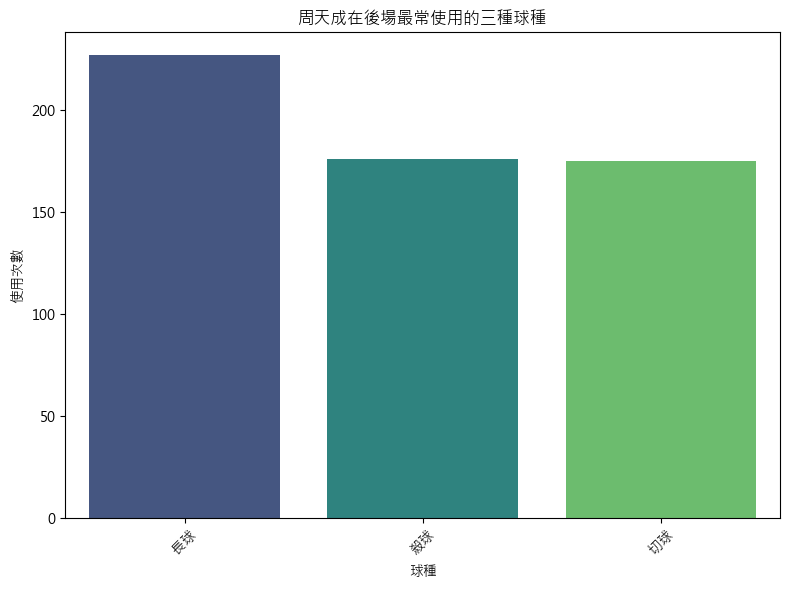

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 選擇周天成在後場擊球的數據
    back_court_areas = [1, 2, 3, 4]
    chou_back_court_hits = df[(df['player'] == 'CHOU Tien Chen') & (df['hit_area'].isin(back_court_areas))]
    
    # 計算球種出現次數
    type_counts = chou_back_court_hits['type'].value_counts().head(3)
    
    # 輸出結果
    print("周天成在後場最常使用的三種球種:")
    for shot_type, count in type_counts.items():
        print(f"{shot_type}: {count} 次")
    
    # 繪製圖表
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x=type_counts.index, y=type_counts.values, ax=ax, palette='viridis')
    ax.set_title('周天成在後場最常使用的三種球種')
    ax.set_xlabel('球種')
    ax.set_ylabel('使用次數')
    plt.xticks(rotation=45)
    plt.tight_layout()
else:
    print("數據集中沒有可用的數據。")

第十題(Wrong)
分析周天成站在前中後場，分別的得分與失分數

前場得分: 9, 失分: 13
中場得分: 67, 失分: 93
後場得分: 9, 失分: 54


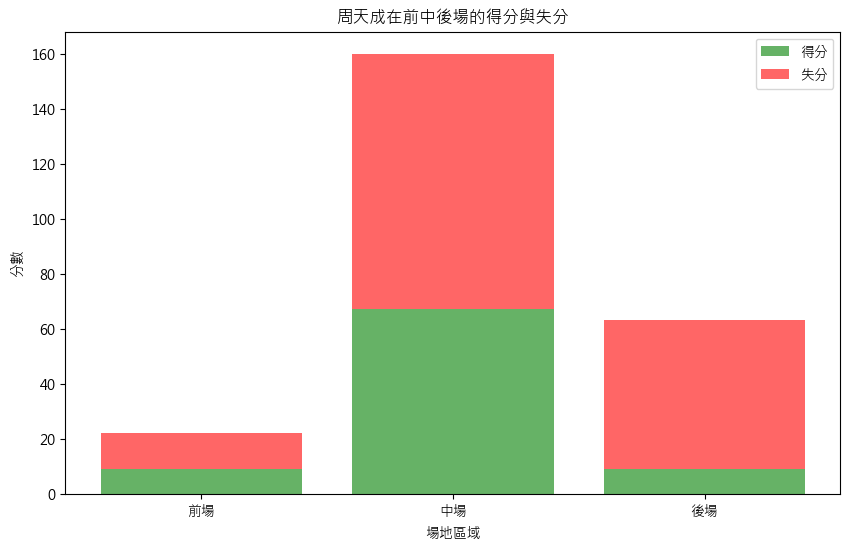

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成的數據
    chou_df = df[df['player'] == 'CHOU Tien Chen']

    # 定義前中後場區域
    front_court_areas = [17, 18, 19, 20, 21, 22, 23, 24]
    mid_court_areas = [9, 10, 11, 12, 13, 14, 15, 16]
    back_court_areas = [1, 2, 3, 4, 5, 6, 7, 8]

    # 計算得分和失分
    def calculate_points(df, areas):
        points_won = df[(df['player_location_area'].isin(areas)) & (df['getpoint_player'] == 'CHOU Tien Chen')].shape[0]
        points_lost = df[(df['player_location_area'].isin(areas)) & (df['getpoint_player'] != 'CHOU Tien Chen') & (df['getpoint_player'].notna())].shape[0]
        return points_won, points_lost

    front_points_won, front_points_lost = calculate_points(chou_df, front_court_areas)
    mid_points_won, mid_points_lost = calculate_points(chou_df, mid_court_areas)
    back_points_won, back_points_lost = calculate_points(chou_df, back_court_areas)

    # 打印結果
    print(f"前場得分: {front_points_won}, 失分: {front_points_lost}")
    print(f"中場得分: {mid_points_won}, 失分: {mid_points_lost}")
    print(f"後場得分: {back_points_won}, 失分: {back_points_lost}")

    # 繪製圖表
    areas = ['前場', '中場', '後場']
    points_won = [front_points_won, mid_points_won, back_points_won]
    points_lost = [front_points_lost, mid_points_lost, back_points_lost]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(areas, points_won, label='得分', color='g', alpha=0.6)
    ax.bar(areas, points_lost, label='失分', color='r', alpha=0.6, bottom=points_won)

    ax.set_title('周天成在前中後場的得分與失分')
    ax.set_xlabel('場地區域')
    ax.set_ylabel('分數')
    ax.legend()

    plt.show()
else:
    print("數據集中沒有可用的數據。")

第11題(OK)
當周天成站在前場時，他最主要的得分方式(球種)?

周天成在前場最主要的得分方式是: 殺球，共得分 7 次。


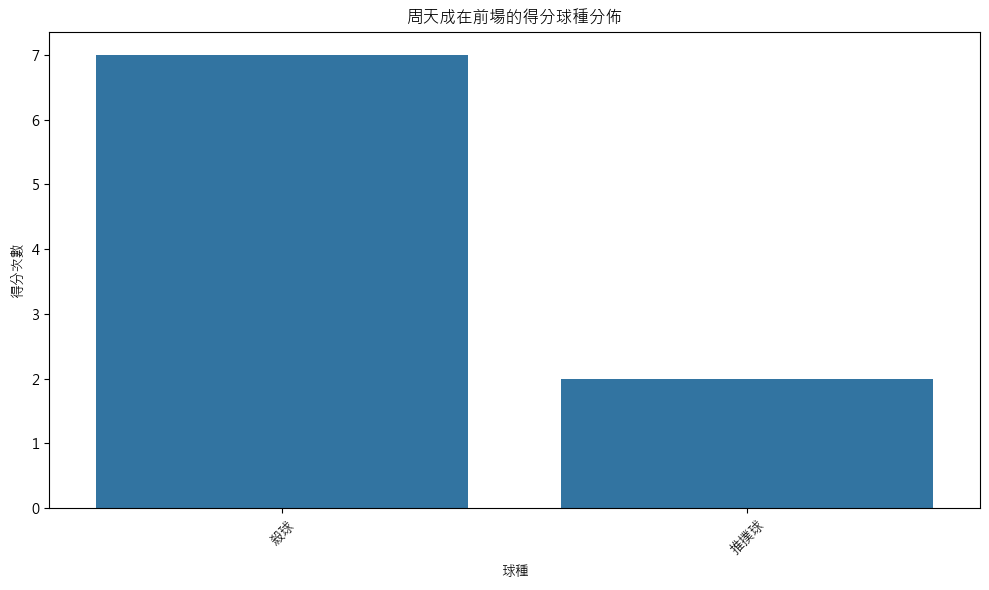

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成在前場的數據
    front_court_areas = [17, 18, 19, 20, 21, 22, 23, 24]
    chou_front_df = df[(df['player'] == 'CHOU Tien Chen') & (df['player_location_area'].isin(front_court_areas))]

    # 過濾出得分的數據
    chou_front_scores = chou_front_df[chou_front_df['getpoint_player'] == 'CHOU Tien Chen']

    # 計算每種球種的得分次數
    score_by_type = chou_front_scores['type'].value_counts()

    # 找出最主要的得分球種
    main_score_type = score_by_type.idxmax()
    main_score_count = score_by_type.max()

    print(f"周天成在前場最主要的得分方式是: {main_score_type}，共得分 {main_score_count} 次。")

    # 繪製得分球種的分佈圖
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=score_by_type.index, y=score_by_type.values, ax=ax)
    ax.set_title('周天成在前場的得分球種分佈')
    ax.set_xlabel('球種')
    ax.set_ylabel('得分次數')
    plt.xticks(rotation=45)
    plt.tight_layout()
else:
    print("數據集中沒有可用的數據。")

第12題(OK)
計算周天成站在前場擊球時的落點分布。

C:\Users\Danie\AppData\Local\Temp\ipykernel_26252\3737615081.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=landing_distribution.index, y=landing_distribution.values, palette='viridis', ax=ax)


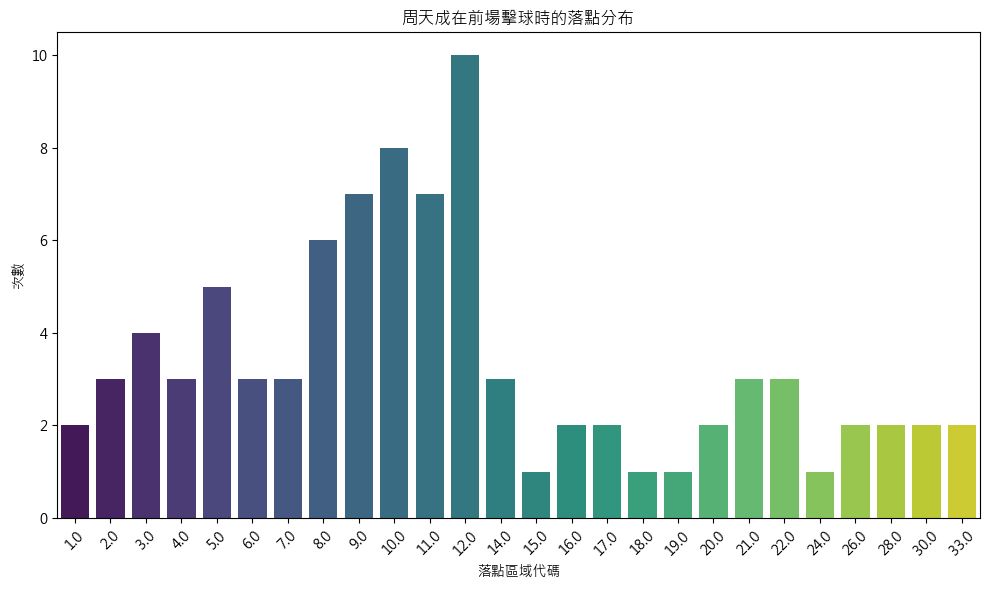

周天成在前場擊球時的落點分布:
landing_area
1.0      2
2.0      3
3.0      4
4.0      3
5.0      5
6.0      3
7.0      3
8.0      6
9.0      7
10.0     8
11.0     7
12.0    10
14.0     3
15.0     1
16.0     2
17.0     2
18.0     1
19.0     1
20.0     2
21.0     3
22.0     3
24.0     1
26.0     2
28.0     2
30.0     2
33.0     2
Name: count, dtype: int64


In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成在前場擊球的數據
    # 前場區域代碼：21, 22, 23, 24, 17, 18, 19, 20
    front_court_areas = [21, 22, 23, 24, 17, 18, 19, 20]
    chou_front_hits = df[(df['player'] == 'CHOU Tien Chen') & (df['player_location_area'].isin(front_court_areas))]

    # 計算落點分布
    landing_distribution = chou_front_hits['landing_area'].value_counts().sort_index()

    # 繪製落點分布圖
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=landing_distribution.index, y=landing_distribution.values, palette='viridis', ax=ax)
    ax.set_title('周天成在前場擊球時的落點分布')
    ax.set_xlabel('落點區域代碼')
    ax.set_ylabel('次數')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 輸出具體的數值分析結果
    print("周天成在前場擊球時的落點分布:")
    print(landing_distribution)
else:
    print("數據集中沒有可用的數據。")

第13題(wrong)
分析周天成站在前中後場擊球時，自己分別的移動距離

C:\Users\Danie\AppData\Local\Temp\ipykernel_26252\1660271916.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chou_df['move_distance'] = np.sqrt(chou_df['player_move_x']**2 + chou_df['player_move_y']**2)
C:\Users\Danie\AppData\Local\Temp\ipykernel_26252\1660271916.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=court_areas, y=distances, ax=ax, palette='viridis')


前場平均移動距離: 0.23
中場平均移動距離: 0.31
後場平均移動距離: 0.36


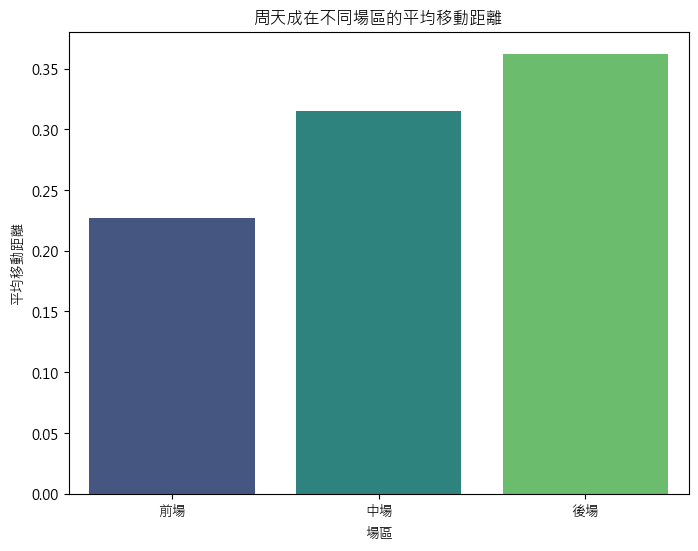

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
# 檢查數據量
if len(df) > 0:
    # 過濾出周天成的數據
    chou_df = df[df['player'] == 'CHOU Tien Chen']

    # 定義前中後場區域
    front_court_areas = [21, 22, 23, 24, 17, 18, 19, 20]
    mid_court_areas = [13, 14, 15, 16, 9, 10, 11, 12]
    back_court_areas = [1, 2, 3, 4, 5, 6, 7, 8]

    # 計算移動距離
    chou_df['move_distance'] = np.sqrt(chou_df['player_move_x']**2 + chou_df['player_move_y']**2)

    # 計算各區域的平均移動距離
    front_court_distance = chou_df[chou_df['player_location_area'].isin(front_court_areas)]['move_distance'].mean()
    mid_court_distance = chou_df[chou_df['player_location_area'].isin(mid_court_areas)]['move_distance'].mean()
    back_court_distance = chou_df[chou_df['player_location_area'].isin(back_court_areas)]['move_distance'].mean()

    # 打印結果
    print(f"前場平均移動距離: {front_court_distance:.2f}")
    print(f"中場平均移動距離: {mid_court_distance:.2f}")
    print(f"後場平均移動距離: {back_court_distance:.2f}")

    # 繪製圖表
    fig, ax = plt.subplots(figsize=(8, 6))
    court_areas = ['前場', '中場', '後場']
    distances = [front_court_distance, mid_court_distance, back_court_distance]

    sns.barplot(x=court_areas, y=distances, ax=ax, palette='viridis')
    ax.set_title('周天成在不同場區的平均移動距離')
    ax.set_xlabel('場區')
    ax.set_ylabel('平均移動距離')

    plt.show()
else:
    print("數據集中沒有可用的數據。")

第14題(OK)
幫我統整周天成所有球種的使用比例，以及每種球種的「得分次數」和「失誤次數」。

   type  count  win_count  lose_count  usage_ratio
0   網前球    582        4.0        40.0     0.223074
1  接殺防守    351        5.0        37.0     0.134534
2   推撲球    334        9.0        19.0     0.128018
3    殺球    299       61.0        20.0     0.114603
4    長球    275        2.0        13.0     0.105404
5    挑球    270        0.0        17.0     0.103488
6    切球    211        2.0         7.0     0.080874
7   發短球    147        0.0         0.0     0.056343
8    平球    106        2.0         8.0     0.040629
9   發長球     34        0.0         0.0     0.013032


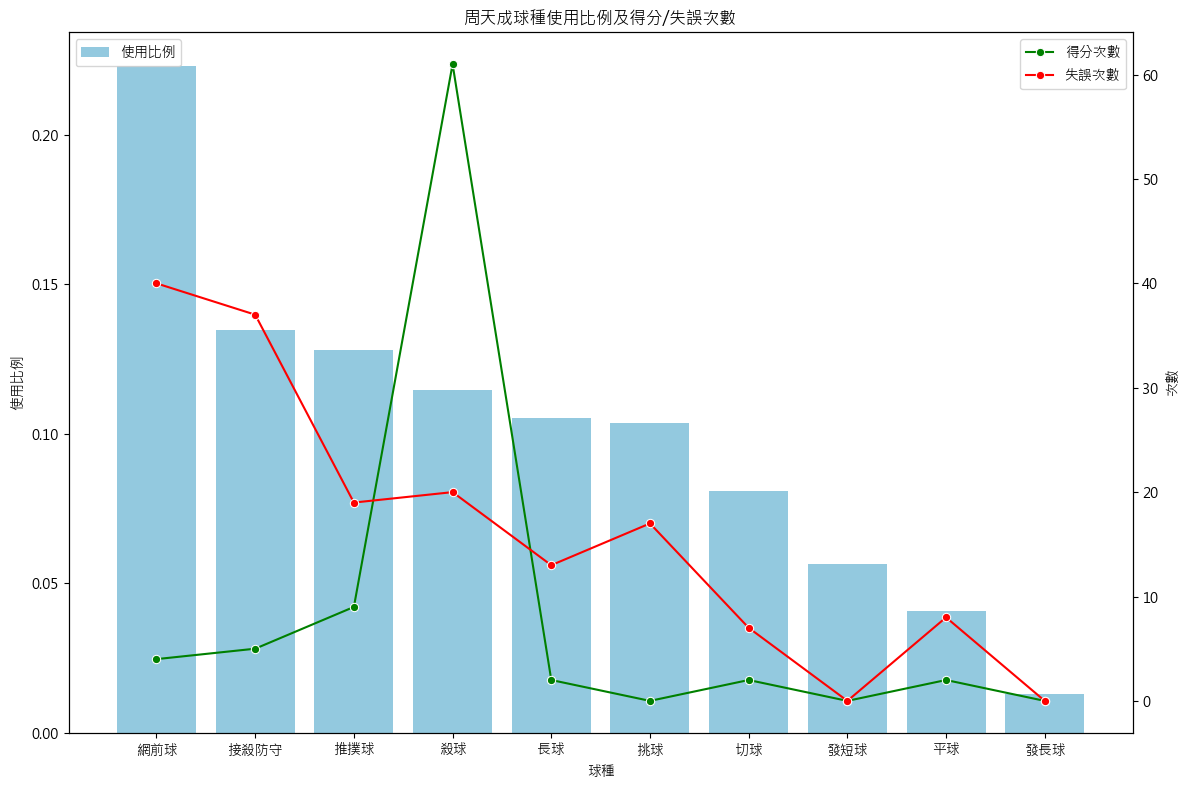

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 篩選出周天成的數據
    chou_df = df[df['player'] == 'CHOU Tien Chen']
    
    # 計算每種球種的使用次數
    type_counts = chou_df['type'].value_counts().reset_index()
    type_counts.columns = ['type', 'count']
    
    # 計算每種球種的得分次數
    win_counts = chou_df[chou_df['getpoint_player'] == 'CHOU Tien Chen']['type'].value_counts().reset_index()
    win_counts.columns = ['type', 'win_count']
    
    # 計算每種球種的失誤次數
    lose_counts = chou_df[chou_df['lose_reason'].notna()]['type'].value_counts().reset_index()
    lose_counts.columns = ['type', 'lose_count']
    
    # 合併數據
    result_df = type_counts.merge(win_counts, on='type', how='left').merge(lose_counts, on='type', how='left').fillna(0)
    
    # 計算使用比例
    result_df['usage_ratio'] = result_df['count'] / result_df['count'].sum()
    
    # 輸出結果
    print(result_df)
    
    # 繪製圖表
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.barplot(data=result_df, x='type', y='usage_ratio', ax=ax, color='skyblue', label='使用比例')
    ax2 = ax.twinx()
    sns.lineplot(data=result_df, x='type', y='win_count', ax=ax2, color='green', marker='o', label='得分次數')
    sns.lineplot(data=result_df, x='type', y='lose_count', ax=ax2, color='red', marker='o', label='失誤次數')
    
    ax.set_title('周天成球種使用比例及得分/失誤次數')
    ax.set_xlabel('球種')
    ax.set_ylabel('使用比例')
    ax2.set_ylabel('次數')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("數據集中沒有可用的數據。")

第15題(OK)
幫我畫周天成失分原因的圓餅圖

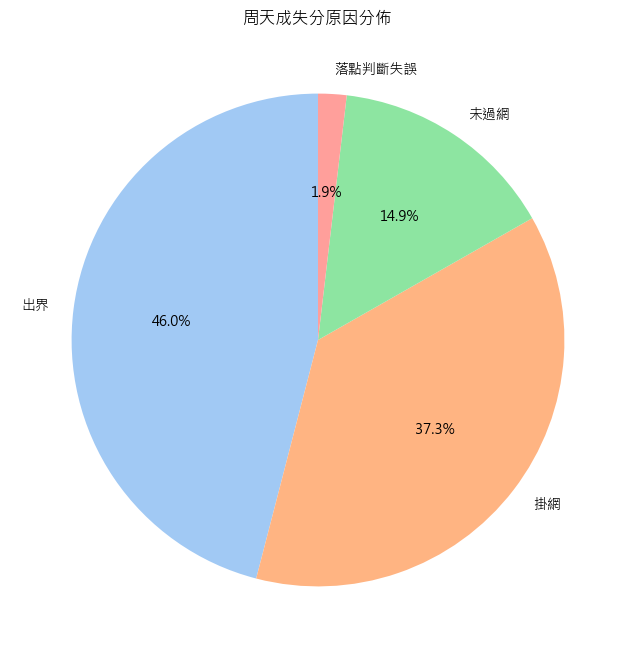

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成的失分原因
    chou_lose_reasons = df[df['player'] == 'CHOU Tien Chen']['lose_reason'].dropna()

    # 計算每個失分原因的次數
    lose_reason_counts = chou_lose_reasons.value_counts()

    # 繪製圓餅圖
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(lose_reason_counts, labels=lose_reason_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax.set_title('周天成失分原因分佈')

    plt.show()
else:
    print("數據集中沒有可用的數據。")

第16題(OK)
在10拍以上的回合中，周天成的得分率是多少？

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 篩選出10拍以上的回合
    df_long_rallies = df[df['ball_round'] > 10]
    
    # 計算周天成在這些回合中的得分次數
    chou_points = df_long_rallies[df_long_rallies['getpoint_player'] == 'CHOU Tien Chen'].shape[0]
    
    # 計算總的10拍以上的回合數
    total_long_rallies = df_long_rallies['rally_id'].nunique()
    
    # 計算得分率
    if total_long_rallies > 0:
        chou_score_rate = chou_points / total_long_rallies
        print(f"周天成在10拍以上的回合中的得分率: {chou_score_rate:.2%}")
    else:
        print("沒有10拍以上的回合數據。")
else:
    print("數據集中沒有數據。")

周天成在10拍以上的回合中的得分率: 47.80%


第17題(OK)
給我所有局的最終得分數

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 選擇每局的最後一筆數據
    final_scores = df.groupby(['match_id', 'set']).tail(1)[['match_id', 'set', 'player_score', 'opponent_score']]
    
    # 印出每局的最終得分
    print("每局的最終得分:")
    print(final_scores)
else:
    print("數據集中沒有數據。")

每局的最終得分:
      match_id  set  player_score  opponent_score
517        1.0    1          21.0            15.0
967        1.0    2          17.0            21.0
1548       1.0    3          21.0            18.0
1959       3.0    1          21.0            19.0
2353       3.0    2          21.0            17.0
2722       5.0    1          21.0            13.0
3028       5.0    2          11.0            21.0
3426       5.0    3          21.0            16.0
3841       6.0    1          22.0            20.0
4110       6.0    2          16.0            21.0
4455       6.0    3          21.0            15.0
4927       7.0    1          21.0            19.0
5203       7.0    2          19.0            11.0


第18題(wrong)
分析周天成前一拍打什麼球種最容易造成對手未過網？

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成的數據
    chou_df = df[df['player'] == 'CHOU Tien Chen']
    
    # 過濾出對手未過網的情況
    net_fault_df = chou_df[chou_df['lose_reason'] == '未過網']
    
    # 計算周天成前一拍的球種
    previous_shot_types = net_fault_df['opponent_type'].value_counts()
    
    # 打印結果
    print("周天成前一拍造成對手未過網的球種分布:")
    print(previous_shot_types)
    
    # 繪製圖表
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=previous_shot_types.index, y=previous_shot_types.values, ax=ax)
    ax.set_title('周天成前一拍造成對手未過網的球種分布')
    ax.set_xlabel('球種代碼')
    ax.set_ylabel('次數')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("數據集中沒有可用的數據。")

第19題(wrong)
當對手被周天成調動到「前場」時，對手最常使用什麼球種？

當對手被調動到前場時，最常使用的球種是: 挑球


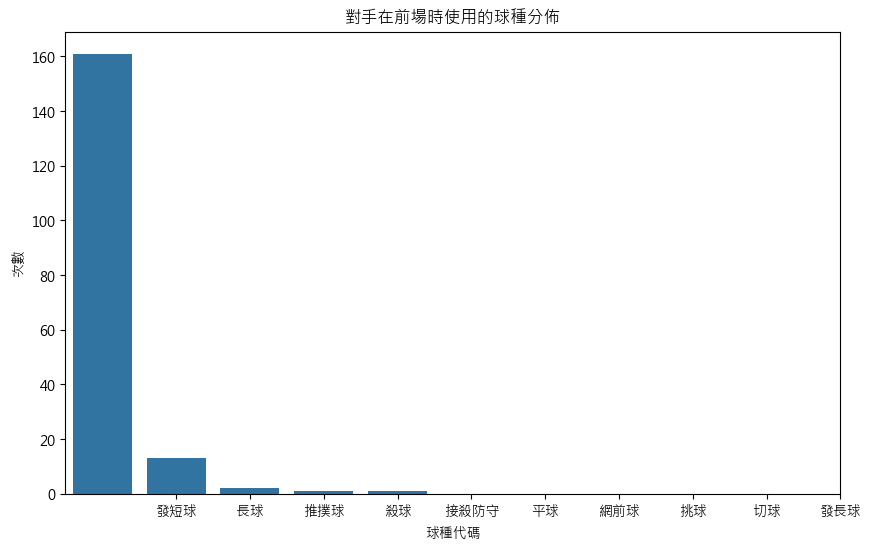

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出對手在前場的數據
    front_court_areas = [21, 22, 23, 24, 17, 18, 19, 20]
    opponent_front_court = df[df['opponent_location_area'].isin(front_court_areas)]
    
    # 計算對手在前場時最常使用的球種
    most_common_shot_type = opponent_front_court['opponent_type'].mode()[0]
    
    # 將球種代碼轉換為中文名稱
    shot_type_mapping = {
        1.0: '發短球', 2.0: '長球', 3.0: '推撲球', 4.0: '殺球', 5.0: '接殺防守',
        6.0: '平球', 7.0: '網前球', 8.0: '挑球', 9.0: '切球', 10.0: '發長球'
    }
    most_common_shot_name = shot_type_mapping.get(most_common_shot_type, '未知球種')
    
    print(f"當對手被調動到前場時，最常使用的球種是: {most_common_shot_name}")

    # 視覺化對手在前場時使用的球種分佈
    plt.figure(figsize=(10, 6))
    sns.countplot(data=opponent_front_court, x='opponent_type', order=opponent_front_court['opponent_type'].value_counts().index)
    plt.title('對手在前場時使用的球種分佈')
    plt.xlabel('球種代碼')
    plt.ylabel('次數')
    plt.xticks(ticks=list(shot_type_mapping.keys()), labels=list(shot_type_mapping.values()))
    plt.show()
else:
    print("數據集中沒有可用的數據。")

第20題(OK)
幫我比較周天成（CHOU Tien Chen）他在短回合（<=4拍）、中回合（5-10拍）、長回合（>=11拍）中的勝率

周天成在不同回合類型中的勝率:
中回合: 44.60%
短回合: 55.38%
長回合: 47.80%


C:\Users\Danie\AppData\Local\Temp\ipykernel_29200\1609024603.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_rates.index, y=win_rates.values, ax=ax, palette='viridis')


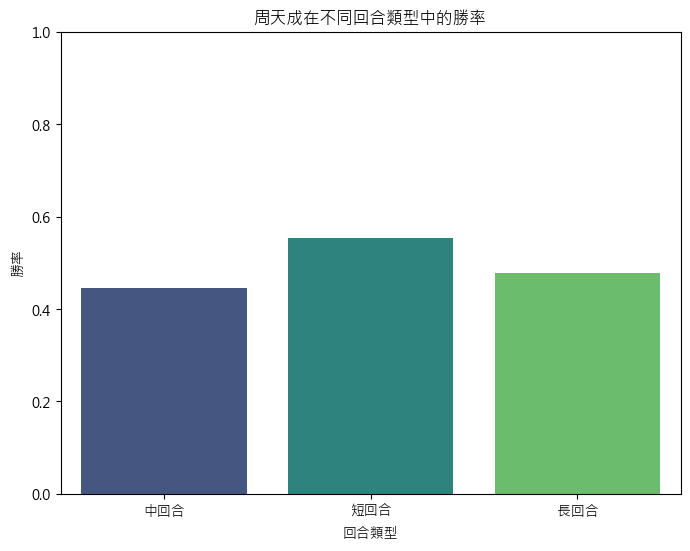

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 計算每個回合的拍數
    rally_lengths = df.groupby('rally_id')['ball_round'].max().reset_index()
    
    # 定義回合類型
    def classify_rally_length(ball_round):
        if ball_round <= 4:
            return '短回合'
        elif 5 <= ball_round <= 10:
            return '中回合'
        else:
            return '長回合'
    
    rally_lengths['rally_type'] = rally_lengths['ball_round'].apply(classify_rally_length)
    
    # 合併回合類型到原始數據
    df = df.merge(rally_lengths[['rally_id', 'rally_type']], on='rally_id', how='left')
    
    # 計算周天成在每種回合類型中的勝率
    win_counts = df[df['getpoint_player'] == 'CHOU Tien Chen'].groupby('rally_type').size()
    total_counts = df.groupby('rally_type')['rally_id'].nunique()
    
    win_rates = (win_counts / total_counts).fillna(0)
    
    # 打印勝率
    print("周天成在不同回合類型中的勝率:")
    for rally_type, win_rate in win_rates.items():
        print(f"{rally_type}: {win_rate:.2%}")
    
    # 繪製勝率圖表
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x=win_rates.index, y=win_rates.values, ax=ax, palette='viridis')
    ax.set_title('周天成在不同回合類型中的勝率')
    ax.set_xlabel('回合類型')
    ax.set_ylabel('勝率')
    plt.ylim(0, 1)
    plt.show()
else:
    print("數據集中沒有可用的數據。")

第21題(OK)
當周天成的對手處於「前場」時，周天成打球的落點分布

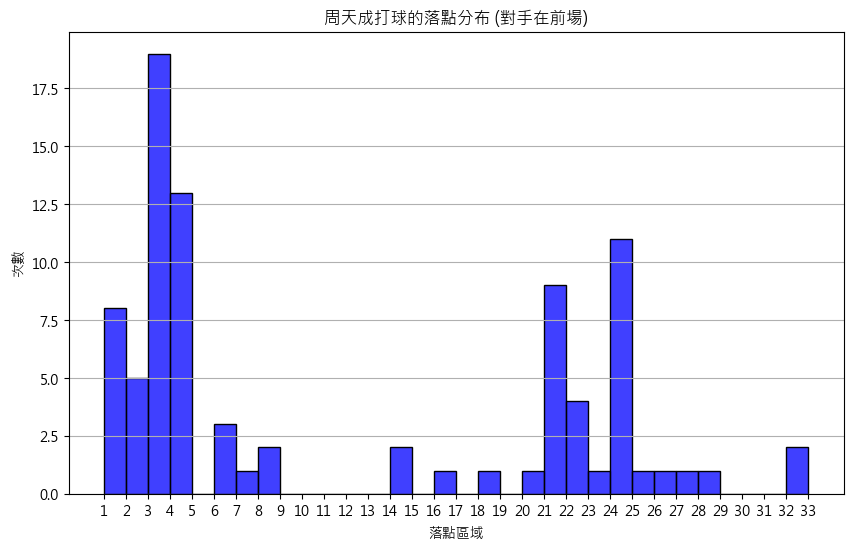

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 選擇周天成作為 player 且對手在前場 (區域 17-24)
    chou_df = df[(df['player'] == 'CHOU Tien Chen') & (df['opponent_location_area'].between(17, 24))]

    # 繪製落點分布
    plt.figure(figsize=(10, 6))
    sns.histplot(chou_df['landing_area'], bins=range(1, 34), kde=False, color='blue', edgecolor='black')
    plt.title('周天成打球的落點分布 (對手在前場)')
    plt.xlabel('落點區域')
    plt.ylabel('次數')
    plt.xticks(range(1, 34))
    plt.grid(axis='y')

    # 顯示圖表
    fig = plt.gcf()
    plt.show()
else:
    print("數據集中沒有可用的數據。")

第22題(OK)
分析周天成使用殺球造成失誤，請繪製失誤原因的圓餅圖

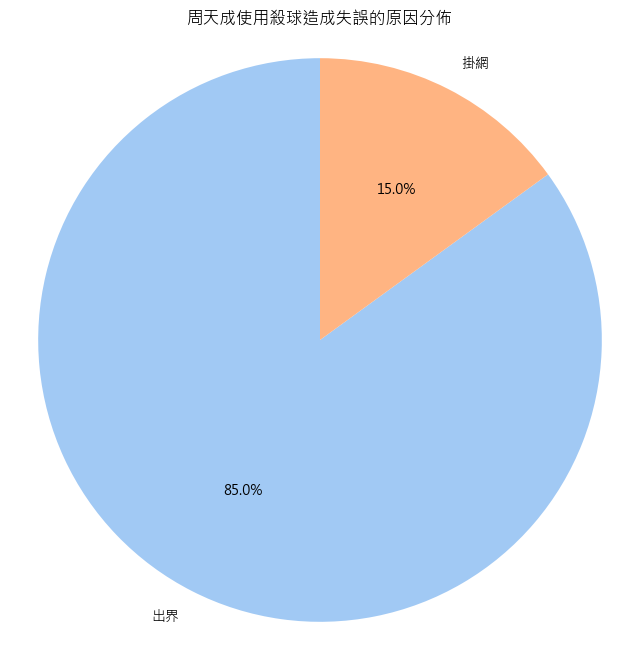

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被系統預先載入
if len(df) > 0:
    # 篩選出周天成使用殺球的數據
    chou_smashed = df[(df['player'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

    # 篩選出失誤的數據
    chou_smashed_errors = chou_smashed[chou_smashed['lose_reason'].notna()]

    # 計算各種失誤原因的次數
    error_counts = chou_smashed_errors['lose_reason'].value_counts()

    # 繪製圓餅圖
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(error_counts, labels=error_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax.set_title('周天成使用殺球造成失誤的原因分佈')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
else:
    print("數據集中沒有可用的數據。")

第23題(OK)
給我周天成最常見的失分原因

In [ ]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成的數據
    chou_df = df[df['player'] == 'CHOU Tien Chen']
    
    # 計算失分原因的次數
    lose_reason_counts = chou_df['lose_reason'].value_counts()
    
    # 印出最常見的失分原因
    if not lose_reason_counts.empty:
        most_common_lose_reason = lose_reason_counts.idxmax()
        print(f"周天成最常見的失分原因是: {most_common_lose_reason}")
    else:
        print("沒有找到周天成的失分數據。")
else:
    print("數據集中沒有資料。")

周天成最常見的失分原因是: 出界


第24題(wrong)
在周天成的所有失分中，有多少百分比是因為對手的殺球導致的？

In [14]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成失分的數據
    chou_lose_points = df[(df['getpoint_player'] == 'Kento MOMOTA') & (df['opponent'] == 'CHOU Tien Chen')]
    
    # 計算總失分數量
    total_lose_points = len(chou_lose_points)
    
    # 計算因為對手殺球導致的失分數量
    smash_lose_points = len(chou_lose_points[chou_lose_points['opponent_type'] == 4.0])  # 假設 '殺球' 的代碼是 4.0
    
    # 計算百分比
    if total_lose_points > 0:
        smash_lose_percentage = (smash_lose_points / total_lose_points) * 100
    else:
        smash_lose_percentage = 0
    
    print(f"周天成的失分中，因為對手的殺球導致的百分比是: {smash_lose_percentage:.2f}%")
else:
    print("數據集中沒有可用的數據。")

周天成的失分中，因為對手的殺球導致的百分比是: 3.03%


第25題(wrong)
繪製周天成所有輸球原因為'掛網'時的球員站位熱區圖？

C:\Users\Danie\AppData\Local\Temp\ipykernel_29200\2755885776.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


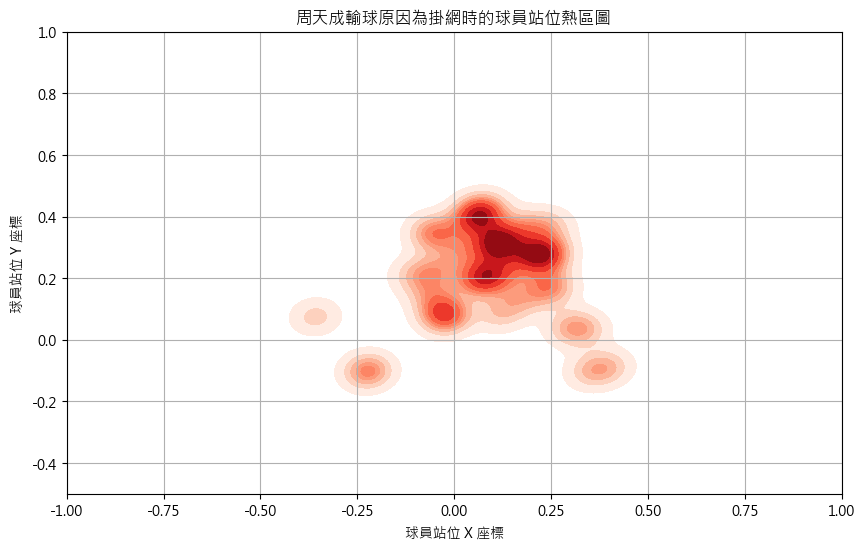

In [15]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 篩選出周天成輸球原因為'掛網'的數據
    chou_lose_net = df[(df['opponent'] == 'CHOU Tien Chen') & (df['lose_reason'] == '掛網')]

    # 檢查是否有數據
    if len(chou_lose_net) > 0:
        # 繪製球員站位熱區圖
        plt.figure(figsize=(10, 6))
        sns.kdeplot(
            x=chou_lose_net['player_location_x'], 
            y=chou_lose_net['player_location_y'], 
            cmap="Reds", 
            shade=True, 
            bw_adjust=0.5
        )
        plt.title('周天成輸球原因為掛網時的球員站位熱區圖')
        plt.xlabel('球員站位 X 座標')
        plt.ylabel('球員站位 Y 座標')
        plt.xlim(-1, 1)
        plt.ylim(-0.5, 1)
        plt.grid(True)
        plt.show()
    else:
        print("沒有找到符合條件的數據。")
else:
    print("數據框為空。")

第26題(wrong)
分析周天成在開局（自己0-5 分）、中局（自己5-18 分）和關鍵分（自己18 分以上）三個比分階段中，他自己移動距離的差異

    score_stage  player_move_distance
0   中局 (5-18 分)              0.325993
1    開局 (0-5 分)              0.319930
2  關鍵分 (18 分以上)              0.290708


C:\Users\Danie\AppData\Local\Temp\ipykernel_29200\2953249675.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chou_df['player_move_distance'] = np.sqrt(chou_df['player_move_x']**2 + chou_df['player_move_y']**2)
C:\Users\Danie\AppData\Local\Temp\ipykernel_29200\2953249675.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chou_df['score_stage'] = chou_df['player_score'].apply(score_stage)
C:\Users\Danie\AppData\Local\Temp\ipykernel_29200\2953249675.py:39: FutureWarning: 

Passing `palette` without assi

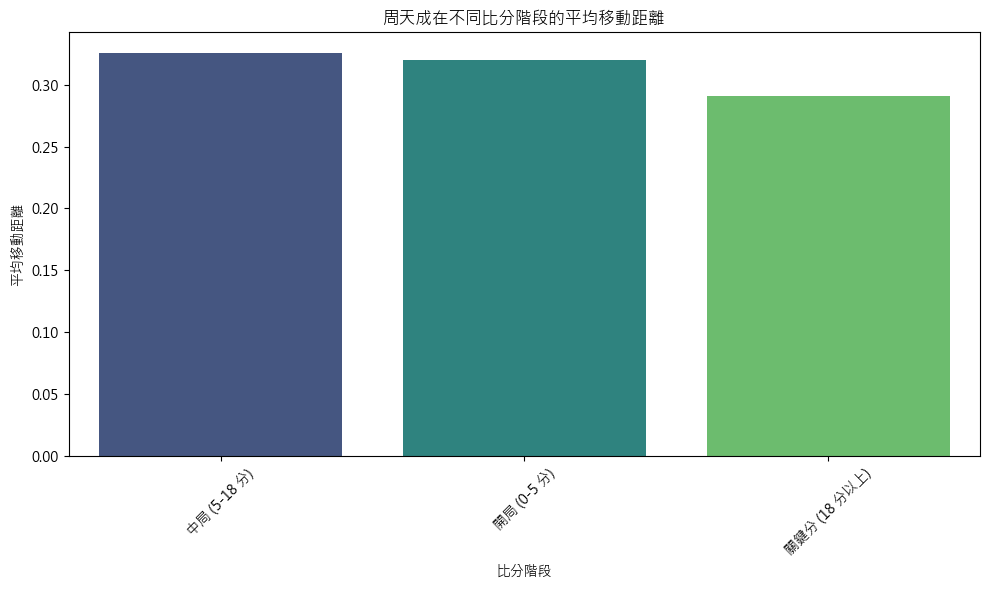

In [16]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成的數據
    chou_df = df[df['player'] == 'CHOU Tien Chen']

    # 定義比分階段
    def score_stage(score):
        if score <= 5:
            return '開局 (0-5 分)'
        elif score <= 18:
            return '中局 (5-18 分)'
        else:
            return '關鍵分 (18 分以上)'

    # 計算移動距離
    chou_df['player_move_distance'] = np.sqrt(chou_df['player_move_x']**2 + chou_df['player_move_y']**2)

    # 添加比分階段
    chou_df['score_stage'] = chou_df['player_score'].apply(score_stage)

    # 計算每個階段的平均移動距離
    stage_move_distance = chou_df.groupby('score_stage')['player_move_distance'].mean().reset_index()

    # 打印結果
    print(stage_move_distance)

    # 繪製圖表
    plt.figure(figsize=(10, 6))
    sns.barplot(data=stage_move_distance, x='score_stage', y='player_move_distance', palette='viridis')
    plt.title('周天成在不同比分階段的平均移動距離')
    plt.xlabel('比分階段')
    plt.ylabel('平均移動距離')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # 保存圖表
    fig = plt.gcf()
else:
    print("數據集中沒有可用的數據。")

第27題(wrong)
當對手使用「殺球」攻擊周天成時，周天成回球的失誤率是多少？

周天成在對手使用「殺球」攻擊時的回球失誤率: 6.08%


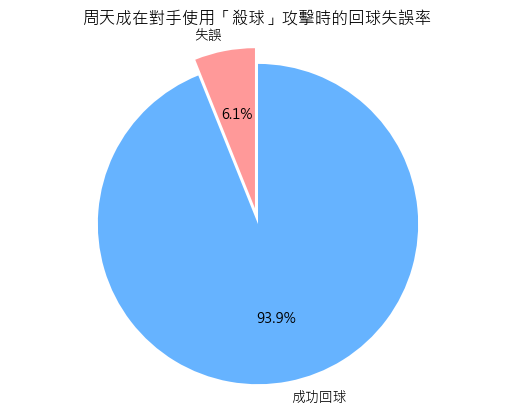

In [18]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出對手使用「殺球」攻擊周天成的數據
    chou_defense_df = df[(df['opponent'] == 'CHOU Tien Chen') & (df['type'] == '殺球')]

    # 計算周天成回球的失誤次數
    chou_errors = chou_defense_df['lose_reason'].notna().sum()

    # 計算總的回球次數
    total_chou_defense = len(chou_defense_df)

    # 計算失誤率
    error_rate = chou_errors / total_chou_defense if total_chou_defense > 0 else 0

    print(f"周天成在對手使用「殺球」攻擊時的回球失誤率: {error_rate:.2%}")

    # 繪製失誤率的圓餅圖
    labels = ['失誤', '成功回球']
    sizes = [chou_errors, total_chou_defense - chou_errors]
    colors = ['#ff9999','#66b3ff']
    explode = (0.1, 0)  # 使失誤部分突出

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('周天成在對手使用「殺球」攻擊時的回球失誤率')
    plt.show()
else:
    print("數據集中沒有可用的數據。")

第28題(Wrong)
分析周天成在開局（他0-5 分）、中局（他5-18 分）和關鍵分（他18 分以上）三個比分階段中，每回合與對手來回的球數的差異

周天成在不同比分階段的平均來回球數:
  score_stage  ball_round
0          中局   12.781377
1          開局   11.784000
2         關鍵分   10.888889


C:\Users\Danie\AppData\Local\Temp\ipykernel_29200\1478797971.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chou_df['score_stage'] = chou_df.apply(score_stage, axis=1)
C:\Users\Danie\AppData\Local\Temp\ipykernel_29200\1478797971.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rally_counts, x='score_stage', y='ball_round', ax=ax, palette='viridis')


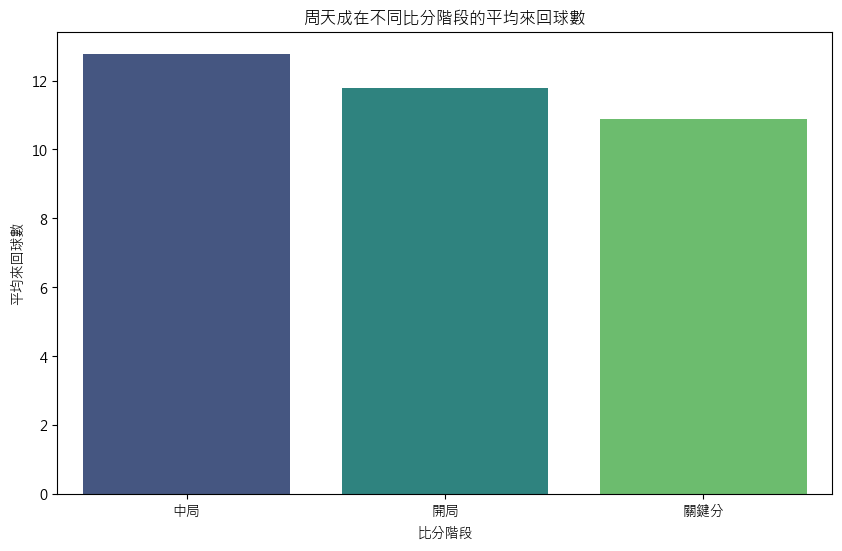

In [20]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s=='Darwin' else ['Microsoft JhengHei', 'SimHei'] if s=='Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被載入
if len(df) > 0:
    # 過濾出周天成的數據
    chou_df = df[df['player'] == 'CHOU Tien Chen']

    # 定義比分階段
    def score_stage(row):
        if row['player_score'] <= 5:
            return '開局'
        elif row['player_score'] <= 18:
            return '中局'
        else:
            return '關鍵分'

    # 添加比分階段欄位
    chou_df['score_stage'] = chou_df.apply(score_stage, axis=1)

    # 計算每個比分階段的平均來回球數
    rally_counts = chou_df.groupby(['score_stage', 'rally_id'])['ball_round'].max().reset_index()
    avg_rally_counts = rally_counts.groupby('score_stage')['ball_round'].mean().reset_index()

    # 打印結果
    print("周天成在不同比分階段的平均來回球數:")
    print(avg_rally_counts)

    # 繪製圖表
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(data=avg_rally_counts, x='score_stage', y='ball_round', ax=ax, palette='viridis')
    ax.set_title('周天成在不同比分階段的平均來回球數')
    ax.set_xlabel('比分階段')
    ax.set_ylabel('平均來回球數')
    plt.show()
else:
    print("數據集中沒有可用的數據。")

第29題(OK)
當周天成打擊出界時，劃出站點的散佈圖?

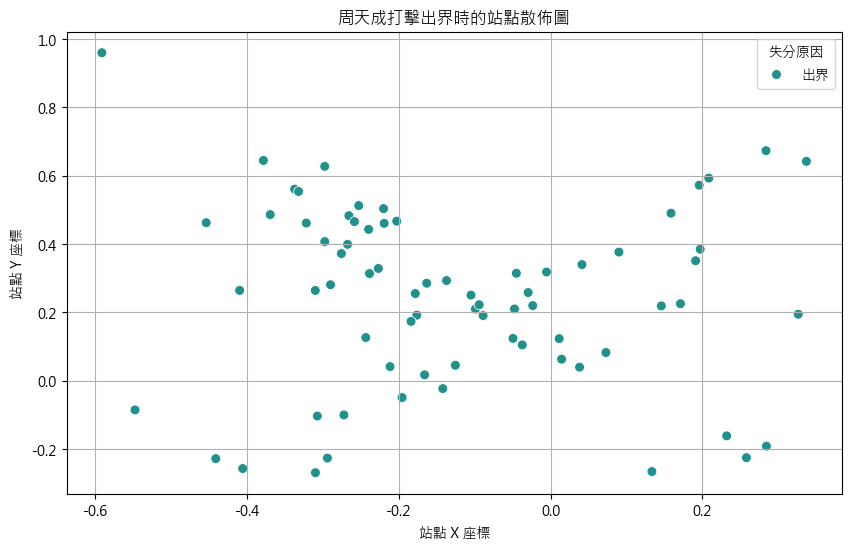

In [21]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 設定字體
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被系統預先載入
if len(df) > 0:
    # 篩選出周天成打擊出界的數據
    chou_out_df = df[(df['player'] == 'CHOU Tien Chen') & (df['lose_reason'] == '出界')]

    # 繪製站點的散佈圖
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=chou_out_df, x='player_location_x', y='player_location_y', hue='lose_reason', palette='viridis', s=50, edgecolor='w')
    plt.title('周天成打擊出界時的站點散佈圖')
    plt.xlabel('站點 X 座標')
    plt.ylabel('站點 Y 座標')
    plt.legend(title='失分原因')
    plt.grid(True)
    plt.show()
else:
    print("數據集中沒有可用的數據。")

第30題(OK)
周天成打擊出界失誤，該球的落點分布

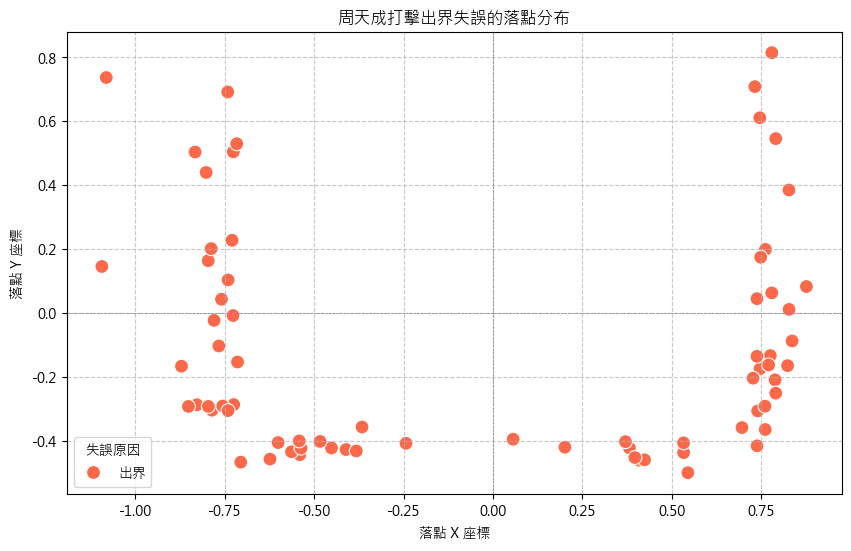

In [22]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 字體設定
s = platform.system()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC'] if s == 'Darwin' else ['Microsoft JhengHei', 'SimHei'] if s == 'Windows' else ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

# 假設 df 已經被系統預先載入
if len(df) > 0:
    # 篩選出周天成打擊出界失誤的數據
    chou_out_of_bounds = df[(df['player'] == 'CHOU Tien Chen') & (df['lose_reason'] == '出界')]

    # 檢查是否有數據
    if len(chou_out_of_bounds) > 0:
        # 繪製落點分布圖
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=chou_out_of_bounds, x='landing_x', y='landing_y', hue='lose_reason', palette='Reds', s=100, edgecolor='w')
        plt.title('周天成打擊出界失誤的落點分布')
        plt.xlabel('落點 X 座標')
        plt.ylabel('落點 Y 座標')
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
        plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title='失誤原因')
        plt.show()
    else:
        print("沒有周天成打擊出界失誤的數據。")
else:
    print("數據框為空。")